In [1]:
import numpy as np
np.random.seed(39)
import leoneed as ln
from matplotlib import pyplot as plt
plt.style.use("solarized-light")

どうだっていい存在じゃない、簡単に愛は終わらないよ。


In [2]:
fc = ln.stage.Sequence([
    ln.needle.Mul_Matrix(( 3 , 4 ), initval=np.array([
        [ 1., 0.,  0.,  0. ],
        [ 0.,  .5,  .5, 0. ],
        [ 0., 0.,  0.,  1. ],
        ])),
    ln.needle.Add_Vector(4),
    ln.needle.Activation_Tanh(4),
    ])

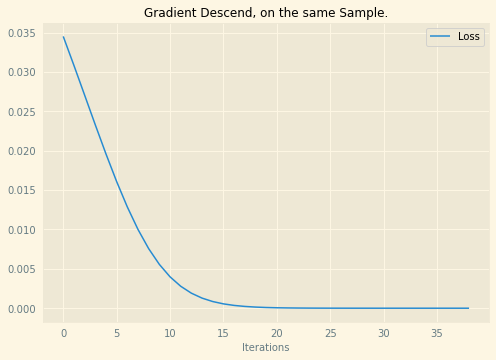

In [3]:
X = np.array([ 1., 0., -1. ]).reshape( 1 , 3 )
y = np.array([ .39, 0., 0., -.39 ]).reshape( 1 , 4 )
loss_history = []
for k in range(39):
    fc, current_loss = fc.fit_sample(X, y)
    loss_history.append(current_loss)
with plt.rc_context({}):
    plt.plot(loss_history, label="Loss")
    plt.legend()
    plt.xlabel("Iterations")
    plt.title("Gradient Descend, on the same Sample.")
    plt.savefig("./gradloss.jpeg")
    plt.show()

W_Encoder(pre-training):
[[ 1.40483957  0.22112104]
 [-0.14532731  0.12319917]
 [ 0.60602697  2.42277001]]
b_Encoder(pre-training):
[[0. 0.]]
W_Decoder(pre-training):
[[-1.91660854 -2.42252709  0.64629422]
 [ 0.20150064 -0.15671318  0.77204576]]
b_Decoder(pre-training):
[[0. 0. 0.]]
W_Encoder(pst-training):
[[ 0.87722083  0.77930038]
 [-0.14532731  0.12319917]
 [ 1.13364571  1.86459068]]
b_Encoder(pst-training):
[[-0.00498058  0.00632017]]
W_Decoder(pst-training):
[[-1.88554672 -2.21171336  0.71931055]
 [-0.56403606  0.55549326  0.85221518]]
b_Decoder(pst-training):
[[ 0.00564453 -0.01603693 -0.01378995]]


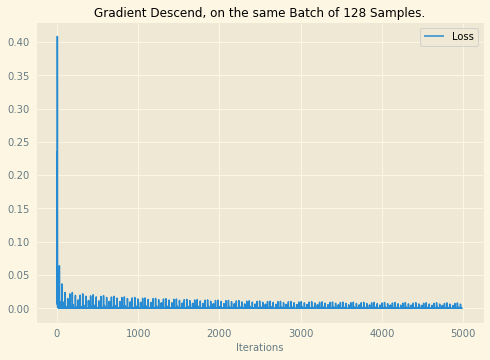

In [4]:
BATCH_SIZE = 128
NUM_EPOCHES = 39
MINI_BATCH = 5
"""
ae = ln.stage.Auto_Encoder(
    3,
    2,
    w1 = np.array([
        [ 1. ,  0.  ],
        [ -.5,   .5 ],
        [ 0. , -1.  ],
        ]),
    w2 = np.array([
        [ 1., -.5,  0. ],
        [ 0.,  .5, -1. ],
        ]),
    )
"""
ae = ln.stage.Auto_Encoder(3, 2)
print("W_Encoder(pre-training):", ae[0].tensor, sep="\n")
print("b_Encoder(pre-training):", ae[1].tensor, sep="\n")
print("W_Decoder(pre-training):", ae[3].tensor, sep="\n")
print("b_Decoder(pre-training):", ae[4].tensor, sep="\n")
randdata = np.random.randn(BATCH_SIZE)
randdata /= np.abs(randdata).max() * 1.28
traindata = np.zeros(( BATCH_SIZE , 3 ))
traindata[ : , 0 ] += randdata
traindata[ : , 2 ] -= randdata
ae_history = []
for idx_epoch in range(NUM_EPOCHES):
    for k in range(BATCH_SIZE):
        ae, ae_loss = ae.fit_sample(traindata[ k : (k + 1) , : ], traindata[ k : (k + 1) , : ])
        ae_history.append(ae_loss)
print("W_Encoder(pst-training):", ae[0].tensor, sep="\n")
print("b_Encoder(pst-training):", ae[1].tensor, sep="\n")
print("W_Decoder(pst-training):", ae[3].tensor, sep="\n")
print("b_Decoder(pst-training):", ae[4].tensor, sep="\n")
with plt.rc_context({}):
    plt.plot(ae_history, label="Loss")
    plt.legend()
    plt.xlabel("Iterations")
    plt.title("Gradient Descend, on the same Batch of %d Samples." % BATCH_SIZE)
    plt.savefig("./gradloss-ae.jpeg")
    plt.show()

In [5]:
ae.predict(np.array([ .39, 0., -.39 ]).reshape( 1 , 3 ))

matrix([[ 0.40139077, -0.00374659, -0.40122172]])